# Stock Price Analysis
In this project we are asked to predict the price certain stock, and the dataset is from yahoo finance 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_csv("NVDA.csv")

In [218]:
df.columns = ['Date', 'Open', 'High', "Low", "Close", "AddjClose", "Volume"]
df.head()

,Date,Open,High,Low,Close,AddjClose,Volume
0,"Oct 7, 2024",124.99,130.64,124.95,127.72,127.72,"346,250,200"
1,"Oct 4, 2024",124.94,125.04,121.83,124.92,124.92,"243,678,100"
2,"Oct 3, 2024",120.92,124.36,120.34,122.85,122.85,"277,118,000"
3,"Oct 2, 2024",116.44,119.38,115.14,118.85,118.85,"221,845,900"
4,"Oct 1, 2024",121.77,122.44,115.79,117.00,117.00,"302,094,500"


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6523 non-null   object 
 1   Open       6523 non-null   object 
 2   High       6469 non-null   float64
 3   Low        6469 non-null   float64
 4   Close      6469 non-null   float64
 5   AddjClose  6469 non-null   float64
 6   Volume     6469 non-null   object 
dtypes: float64(4), object(3)
memory usage: 356.9+ KB


# Data preprocessing
After acquiring the dataset we can see there are a lot of nosies and empty value,
But first we reversed the data so that we can see that in correct order. 
Then we drop the empty value and convert the data object to float so we can process it better 

In [223]:
df = df[::-1]

In [225]:
import tensorflow as tf
import keras
from keras import layers

In [227]:
df = df.dropna()

In [229]:
df["Open"] = df.Open.astype(float)
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')
df["Volume"] = df["Volume"].map(atof)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6469 entries, 6522 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6469 non-null   object 
 1   Open       6469 non-null   float64
 2   High       6469 non-null   float64
 3   Low        6469 non-null   float64
 4   Close      6469 non-null   float64
 5   AddjClose  6469 non-null   float64
 6   Volume     6469 non-null   float64
dtypes: float64(6), object(1)
memory usage: 404.3+ KB


# Scaling data 
After processing the data we select proper data for training our algorithms then scaled those data between 0 and 1 for uniformed result \
Then we seprate our X and Y and then use train_test_split to split our data into training and testing set

In [18]:
training_set = df.iloc[:, 2:4].values

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
from sklearn.model_selection import train_test_split

X_data = []
y_data = []
for i in range(60, len(training_set_scaled)):
    X_data.append(training_set_scaled[i-60:i, 0])
    y_data.append(training_set_scaled[i, 0])
X_data, y_data = np.array(X_data), np.array(y_data)

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_data, y_data, test_size=0.2, shuffle=False
)

X_train = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_test = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))

In [21]:
model = keras.Sequential()
model.add(layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(layers.SimpleRNN(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(layers.SimpleRNN(50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

C:\Users\Peanut Monster\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

# Training RNN 

In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train1,epochs=100,batch_size=32)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0163
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6457e-04
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.4110e-04
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3440e-04
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3628e-04
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3073e-04
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3674e-04
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3943e-04
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2998e-04
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3684e-04
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.4076e-04
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2777e-04
Epoch 13/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2543e-04
Epoch 14/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/s

In [39]:
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)

predicted_stock_price = model.predict(X_test1)
predicted_stock_price = predicted_stock_price.reshape(-1, 1)

num_samples = predicted_stock_price.shape[0]
temp_array = np.zeros((num_samples, 2))
temp_array[:, 0] = predicted_stock_price[:, 0]
predicted_stock_price = sc.inverse_transform(temp_array)[:, 0]

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [40]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = np.hstack((predicted_stock_price, predicted_stock_price))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [43]:
dummy_column = np.zeros_like(y_test1)
y_test1_reshaped = np.column_stack([y_test1, dummy_column])
inversed_y_test1 = sc.inverse_transform(y_test1_reshaped)
inversed_y_test1 = inversed_y_test1[:, 0]

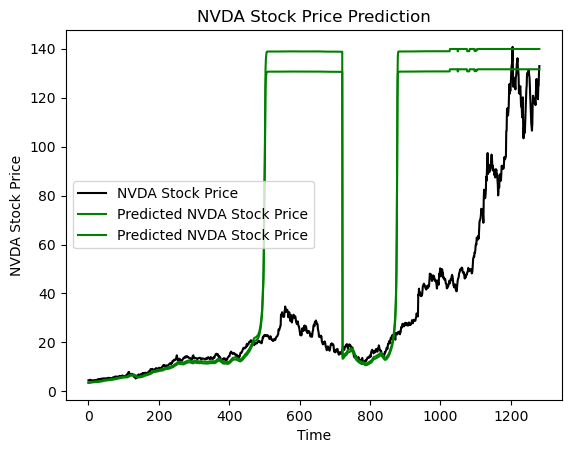

In [45]:
plt.plot(inversed_y_test1, color = 'black', label = 'NVDA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted NVDA Stock Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(inversed_y_test1, predicted_stock_price[:, 0]))
mae = mean_absolute_error(inversed_y_test1, predicted_stock_price[:, 0])
r2 = r2_score(inversed_y_test1, predicted_stock_price[:, 0])
print("R2 for RNN: ",r2)
print("MAE for RNN: ",mae)
print("RMSE for RNN: ",rmse)

R2 for RNN:  -3.060139935483231
MAE for RNN:  42.9668464774163
RMSE for RNN:  64.97236830805039


# Training LSTM

In [34]:
dummy_column = np.zeros_like(y_test1)
y_test1_reshaped = np.column_stack([y_test1, dummy_column])
inversed_y_test1 = sc.inverse_transform(y_test1_reshaped)
inversed_y_test1 = inversed_y_test1[:, 0]

In [35]:
rmse = np.sqrt(mean_squared_error(inversed_y_test1, predicted_stock_price[:, 0]))
mae = mean_absolute_error(inversed_y_test1, predicted_stock_price[:, 0])
r2 = r2_score(inversed_y_test1, predicted_stock_price[:, 0])
print("R2 RNN : ",r2)
print("MAE Of RNN : ",mae)
print("RMSE Of RNN : ",rmse)

R2 RNN :  -0.7739496110509703
MAE Of RNN :  28.356455159633654
RMSE Of RNN :  42.94660484467294


In [36]:
model1 = keras.Sequential()
model1.add(layers.LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model1.add(keras.layers.Dropout(0.2))
model1.add(layers.LSTM(units=50,return_sequences=True))
model1.add(keras.layers.Dropout(0.2))
model1.add(layers.LSTM(units=50,return_sequences=True))
model1.add(keras.layers.Dropout(0.2))
model1.add(layers.LSTM(units=50))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(units=1))
model1.summary()

C:\Users\Peanut Monster\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model1.compile(optimizer='adam',loss='mean_squared_error')
model1.fit(X_train1,y_train1,epochs=100,batch_size=32)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 7.9798e-05
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 6.3007e-06
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.2219e-06
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.2054e-06
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 3.7635e-06
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 4.5581e-06
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 3.8987e-06
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 4.8281e-06
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.9449e-06
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.3041e-06
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 3.1404e-06
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 3.2372e-06
Epoch 13/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 3.5886e-06
Epoch 14/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 3

In [38]:
predicted_stock_price = model1.predict(X_test1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [39]:
predicted_stock_price = np.hstack((predicted_stock_price, predicted_stock_price))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [40]:
dummy_column = np.zeros_like(y_test1)
y_test1_reshaped = np.column_stack([y_test1, dummy_column])
inversed_y_test11 = sc.inverse_transform(y_test1_reshaped)
inversed_y_test11 = inversed_y_test11[:, 0]

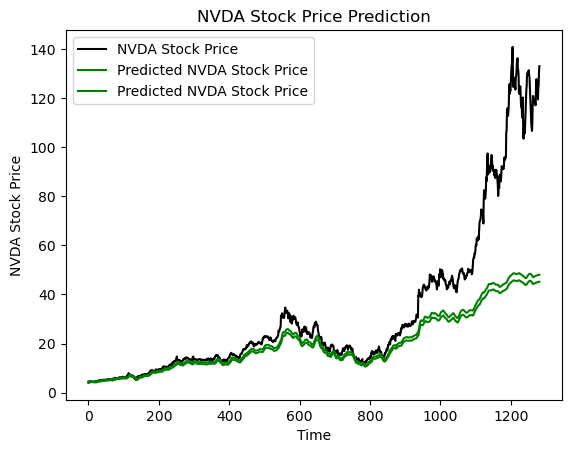

In [41]:
plt.plot(inversed_y_test11, color = 'black', label = 'NVDA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted NVDA Stock Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(inversed_y_test11, predicted_stock_price[:, 0]))
mae = mean_absolute_error(inversed_y_test11, predicted_stock_price[:, 0])
r2 = r2_score(inversed_y_test11, predicted_stock_price[:, 0])

In [43]:
print("R2 for LSTM: ",r2)
print("MAE for LSTM: ",mae)
print("RMSE for LSTM: ",rmse)

R2 for LSTM:  0.4567436653655246
MAE for LSTM:  11.61077832592445
RMSE for LSTM:  23.766246433421887


# Training XGBOOST

In [52]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [54]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Adding Lag Feature 
Adding past relation to 

In [56]:
df['Lag_1'] = df['Close'].shift(1)
df['Lag_3'] = df['Close'].shift(3)

df['SMA_5'] = df['Close'].rolling(window=5).mean()

df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

df['RSI'] = compute_rsi(df, window=14)

df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

df['Pct_change'] = df['Close'].pct_change()

df['Cumulative_Returns'] = (1 + df['Pct_change']).cumprod()

df = df.dropna()

print(df)

              Date    Open    High     Low   Close  AdjClose       Volume  \
6510  Feb 10, 1999    0.04    0.04    0.04    0.04      0.03  148224000.0   
6509  Feb 11, 1999    0.04    0.04    0.04    0.04      0.04  132240000.0   
6508  Feb 12, 1999    0.04    0.04    0.04    0.04      0.04  109728000.0   
6502  Feb 23, 1999    0.04    0.05    0.04    0.05      0.04  138096000.0   
6501  Feb 24, 1999    0.05    0.05    0.05    0.05      0.05  612768000.0   
...            ...     ...     ...     ...     ...       ...          ...   
4      Oct 2, 2024  116.44  119.38  115.14  118.85    118.85  221845900.0   
3      Oct 3, 2024  120.92  124.36  120.34  122.85    122.85  277118000.0   
2      Oct 4, 2024  124.94  125.04  121.83  124.92    124.92  243678100.0   
1      Oct 7, 2024  124.99  130.64  124.95  127.72    127.72  344944800.0   
0      Oct 8, 2024  130.33  132.92  129.42  132.18    132.18  164371496.0   

       Lag_1   Lag_3    SMA_5      EMA_10         RSI      EMA_12      EMA_

In [58]:
X = df[['Lag_1', 'Lag_3', 'SMA_5', 'RSI', 'Pct_change']]
y = df['Close']

Mean Squared Error: 1609.7998027861843


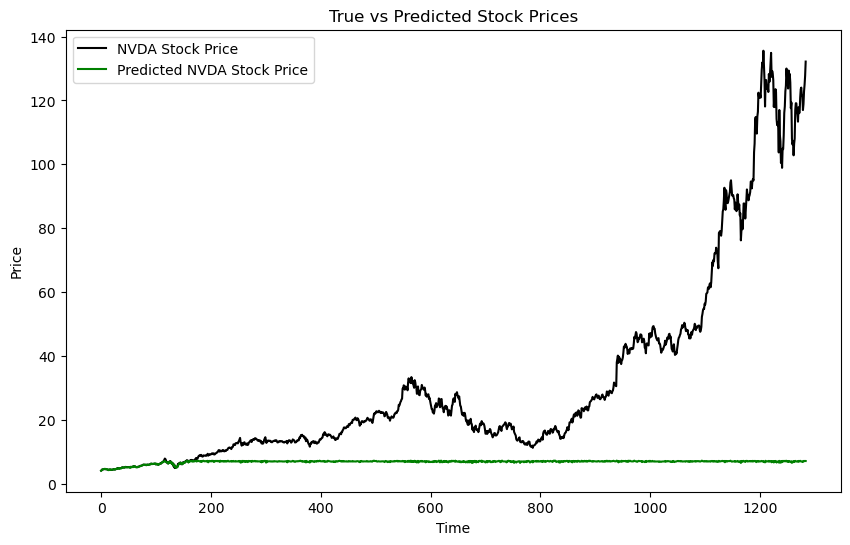

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), color = 'black', label = 'NVDA Stock Price')
plt.plot(y_pred, color = 'green', label = 'Predicted NVDA Stock Price')
plt.title('True vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 for XGBOOST: ",r2)
print("MAE for XGBOOST: ",mae)
print("RMSE for XGBOOST: ",rmse)

R2 for XGBOOST:  -0.61238041230012
MAE for XGBOOST:  24.91053237497621
RMSE for XGBOOST:  40.122310536485614


In [555]:
import numpy as np
from typing import List, Tuple

class Tanh:
    def forward(self, inputs):
        self.output = np.tanh(inputs)
        self.input = inputs
    
    def backward(self, dvalues):
        deriv = 1 - self.output ** 2
        self.dinputs = np.multiply(deriv, dvalues)

class Sigmoid:
    def forward(self, input):
        self.input = input
        self.output = np.clip(1 / (1 + np.exp(-input)), 1e-7, 1 - 1e-7)
    
    def backward(self, dvalue):
        sigmoid = self.output
        deriv = sigmoid * (1 - sigmoid)
        self.dinput = deriv * dvalue

class DenseLayer:
    def __init__(self, n_input, n_neurons):
        self.weights = 0.1 * np.random.randn(n_input, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, input):
        self.input = input
        self.output = np.dot(input, self.weights) + self.biases

    def backward(self, dvalues):
        dvalues = dvalues.reshape(self.output.shape)
        self.dweights = np.dot(self.input.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinput = np.dot(dvalues, self.weights.T)

class LSTM:
    def __init__(self, n_input: int, n_neurons: int) -> None:
        self.n_input = n_input
        self.n_neurons = n_neurons

        # Weights and biases initialization
        self.Uf = 0.1 * np.random.randn(n_neurons, n_input) 
        self.bf = np.zeros((n_neurons, 1)) 
        self.Wf = 0.1 * np.random.randn(n_neurons, n_neurons)

        self.Ui = 0.1 * np.random.randn(n_neurons, n_input)
        self.bi = np.zeros((n_neurons, 1))
        self.Wi = 0.1 * np.random.randn(n_neurons, n_neurons)

        self.Uo = 0.1 * np.random.randn(n_neurons, n_input)
        self.bo = np.zeros((n_neurons, 1))
        self.Wo = 0.1 * np.random.randn(n_neurons, n_neurons)

        self.Ug = 0.1 * np.random.randn(n_neurons, n_input)
        self.bg = np.zeros((n_neurons, 1))
        self.Wg = 0.1 * np.random.randn(n_neurons, n_neurons)

    def forward(self, X_t):
        self.T = X_t.shape[0]
        self.X_t = X_t

        self.H = [np.zeros((self.n_neurons, 1)) for _ in range(self.T + 1)]
        self.C = [np.zeros((self.n_neurons, 1)) for _ in range(self.T + 1)]
        self.C_tilde = [np.zeros((self.n_neurons, 1)) for _ in range(self.T + 1)]

        self.F = [np.zeros((self.n_neurons, 1)) for _ in range(self.T)]
        self.O = [np.zeros((self.n_neurons, 1)) for _ in range(self.T)]
        self.I = [np.zeros((self.n_neurons, 1)) for _ in range(self.T)]

        self.dUf = np.zeros((self.n_neurons, self.n_input))
        self.dbf = np.zeros((self.n_neurons, 1))
        self.dWf = np.zeros((self.n_neurons, self.n_neurons))

        self.dUi = np.zeros((self.n_neurons, self.n_input))
        self.dWi = np.zeros((self.n_neurons, self.n_neurons))
        self.dbi = np.zeros((self.n_neurons, 1))
        
        self.dUo = np.zeros((self.n_neurons, self.n_input))
        self.dbo = np.zeros((self.n_neurons, 1))
        self.dWo = np.zeros((self.n_neurons, self.n_neurons))

        self.dUg = np.zeros((self.n_neurons, self.n_input))
        self.dbg = np.zeros((self.n_neurons, 1))
        self.dWg = np.zeros((self.n_neurons, self.n_neurons))

        self.Sigmf = [Sigmoid() for _ in range(self.T)]
        self.Sigmi = [Sigmoid() for _ in range(self.T)]
        self.Sigmo = [Sigmoid() for _ in range(self.T)]
        self.Tanh1 = [Tanh() for _ in range(self.T)]
        self.Tanh2 = [Tanh() for _ in range(self.T)]

        ht = self.H[0]
        ct = self.C[0]

        # LSTM Cell Call
        self.H, self.C, self.F, self.O, self.I, self.C_tilde = self.LSTMCELL(X_t, ht, ct)

    def LSTMCELL(self, X_t, ht, ct):
        for t in range(self.T):
            xt = X_t[t].reshape(-1, 1)

            # Forget gate
            outf = np.dot(self.Uf, xt) + np.dot(self.Wf, ht) + self.bf
            self.Sigmf[t].forward(outf)
            ft = self.Sigmf[t].output

            # Input gate
            outi = np.dot(self.Ui, xt) + np.dot(self.Wi, ht) + self.bi
            self.Sigmi[t].forward(outi) 
            it = self.Sigmi[t].output

            # Output gate
            outo = np.dot(self.Uo, xt) + np.dot(self.Wo, ht) + self.bo
            self.Sigmo[t].forward(outo)  
            ot = self.Sigmo[t].output

            # C tilde
            outct_tilde = np.dot(self.Ug, xt) + np.dot(self.Wg, ht) + self.bg
            self.Tanh1[t].forward(outct_tilde)
            ct_tilde = self.Tanh1[t].output

            ct = ft * ct + it * ct_tilde

            self.Tanh2[t].forward(ct)
            ht = self.Tanh2[t].output * ot

            self.H[t + 1] = ht
            self.C[t + 1] = ct
            self.C_tilde[t] = ct_tilde
            self.F[t] = ft
            self.O[t] = ot
            self.I[t] = it

        return self.H, self.C, self.F, self.O, self.I, self.C_tilde

    def backward(self, dvalues):
        dht = dvalues[-1].reshape(self.n_neurons, 1)

        for t in reversed(range(self.T)):
            xt = self.X_t[t].reshape(-1, 1)

            self.Tanh2[t].backward(dht)
            dtanh2 = self.Tanh2[t].dinputs

            dhtdtanh = self.O[t] * dtanh2

            dctdft = dhtdtanh * self.C[t - 1]
            dctdit = dhtdtanh * self.C_tilde[t]
            dctct_tilde = dhtdtanh * self.I[t]

            self.Tanh1[t].backward(dctct_tilde)
            dtanh1 = self.Tanh1[t].dinputs

            self.Sigmf[t].backward(dctdft)
            dsigmf = self.Sigmf[t].dinput

            self.Sigmi[t].backward(dctdit)
            dsigmi = self.Sigmi[t].dinput

            self.Sigmo[t].backward(dht)
            dsigmo = self.Sigmo[t].dinput

            self.dUf += np.dot(dsigmf, xt.T)
            self.dWf += np.dot(dsigmf, self.H[t-1].T) if t > 0 else 0 
            self.dbf += dsigmf

            self.dUi += np.dot(dsigmi, xt.T)
            self.dWi += np.dot(dsigmi, self.H[t-1].T) if t > 0 else 0 
            self.dbi += dsigmi

            self.dUo += np.dot(dsigmo, xt.T)
            self.dWo += np.dot(dsigmo, self.H[t-1].T) if t > 0 else 0 
            self.dbo += dsigmo

            self.dUg += np.dot(dtanh1, xt.T)
            self.dWg += np.dot(dtanh1, self.H[t-1].T) if t > 0 else 0 
            self.dbg += dtanh1

            dht = (np.dot(self.Wf.T, dsigmf) + np.dot(self.Wi.T, dsigmi) +
                   np.dot(self.Wo.T, dsigmo) + np.dot(self.Wg.T, dtanh1) +
                   (dvalues[t-1].reshape(self.n_neurons, 1) if t > 0 else 0))
        self.H = self.H 

In [557]:
lstm = LSTM(60, 100)

In [559]:
T = max(X_train.flatten().shape)
T

307680

In [561]:
dense1 = DenseLayer(100, 50)
dense2 = DenseLayer(50, 1)

In [563]:
lr = 0.0001
epoch = 100
monitor = np.zeros((100))

batch_size = 5128  


for i in range(epoch):
    print(f"Epoch {i+1}/{epoch}")

    lstm.forward(X_train) 
    H = np.array(lstm.H)
    H = H.reshape((H.shape[0], H.shape[1])) 

    dense1.forward(H[1:, :])
    dense2.forward(dense1.output)

    y_hat = dense2.output
    
    y_train1 = y_train1[:y_hat.shape[0]].reshape(-1, 1)

    dy = y_hat - y_train1

    L = 0.5 * np.mean(dy**2)
    monitor[i] = L
    

    dense2.backward(dy)
    dense1.backward(dense2.dinput)
    lstm.backward(dense1.dinput)


    dense1.weights -= lr * dense1.dweights
    dense1.biases -= lr * dense1.dbiases
    dense2.weights -= lr * dense2.dweights
    dense2.biases -= lr * dense2.dbiases

    lstm.Uf -= lr * lstm.dUf
    lstm.Ui -= lr * lstm.dUi
    lstm.Uo -= lr * lstm.dUo
    lstm.Ug -= lr * lstm.dUg
    lstm.Wf -= lr * lstm.dWf
    lstm.Wi -= lr * lstm.dWi
    lstm.Wo -= lr * lstm.dWo
    lstm.Wg -= lr * lstm.dWg
    lstm.bf -= lr * lstm.dbf
    lstm.bi -= lr * lstm.dbi
    lstm.bo -= lr * lstm.dbo
    lstm.bg -= lr * lstm.dbg


    print(f'Current MSSE = {L}')

Epoch 1/100
Current MSSE = 0.0001927836806247682
Epoch 2/100
Current MSSE = 0.00014092940569124878
Epoch 3/100
Current MSSE = 0.00014019745862484725
Epoch 4/100
Current MSSE = 0.0001396546725987429
Epoch 5/100
Current MSSE = 0.00013911487846783336
Epoch 6/100
Current MSSE = 0.00013857737400678233
Epoch 7/100
Current MSSE = 0.00013804214457568452
Epoch 8/100
Current MSSE = 0.00013750917861206707
Epoch 9/100
Current MSSE = 0.00013697846466906343
Epoch 10/100
Current MSSE = 0.000136449991376667
Epoch 11/100
Current MSSE = 0.00013592374743930593
Epoch 12/100
Current MSSE = 0.00013539972163511657
Epoch 13/100
Current MSSE = 0.0001348779028153245
Epoch 14/100
Current MSSE = 0.0001343582799036381
Epoch 15/100
Current MSSE = 0.00013384084189564823
Epoch 16/100
Current MSSE = 0.00013332557785823387
Epoch 17/100
Current MSSE = 0.00013281247692897394
Epoch 18/100
Current MSSE = 0.00013230152831556462
Epoch 19/100
Current MSSE = 0.00013179272129524257
Epoch 20/100
Current MSSE = 0.0001312860452142